In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
!pip install kaggle

In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [5]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 96% 515M/534M [00:05<00:00, 176MB/s]
100% 534M/534M [00:05<00:00, 98.0MB/s]


In [6]:
!ls

kaggle.json  sample_data  vegetable-image-dataset.zip


In [8]:
# Unzip the downloaded dataset
with ZipFile("vegetable-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir("Vegetable Images"))

['validation', 'train', 'test']


In [11]:
print(len(os.listdir("Vegetable Images/train")))
print(os.listdir("Vegetable Images/train"))


15
['Pumpkin', 'Radish', 'Carrot', 'Bitter_Gourd', 'Cauliflower', 'Cabbage', 'Brinjal', 'Cucumber', 'Bean', 'Potato', 'Bottle_Gourd', 'Capsicum', 'Tomato', 'Broccoli', 'Papaya']


In [24]:
def len_images():
    counts = {}
    base_path = "Vegetable Images/train"

    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        counts[category] = len(os.listdir(category_path))

    return counts

In [25]:
len_images()

{'Pumpkin': 1000,
 'Radish': 1000,
 'Carrot': 1000,
 'Bitter_Gourd': 1000,
 'Cauliflower': 1000,
 'Cabbage': 1000,
 'Brinjal': 1000,
 'Cucumber': 1000,
 'Bean': 1000,
 'Potato': 1000,
 'Bottle_Gourd': 1000,
 'Capsicum': 1000,
 'Tomato': 1000,
 'Broccoli': 1000,
 'Papaya': 1000}

In [26]:
image_counts = len_images()
for category, count in image_counts.items():
    print(f"Number of {category} images: {count}")

Number of Pumpkin images: 1000
Number of Radish images: 1000
Number of Carrot images: 1000
Number of Bitter_Gourd images: 1000
Number of Cauliflower images: 1000
Number of Cabbage images: 1000
Number of Brinjal images: 1000
Number of Cucumber images: 1000
Number of Bean images: 1000
Number of Potato images: 1000
Number of Bottle_Gourd images: 1000
Number of Capsicum images: 1000
Number of Tomato images: 1000
Number of Broccoli images: 1000
Number of Papaya images: 1000


In [27]:
def len_images():
    counts = {}
    base_path = "Vegetable Images/test"

    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        counts[category] = len(os.listdir(category_path))

    return counts

image_counts = len_images()
for category, count in image_counts.items():
    print(f"Number of {category} images: {count}")

Number of Pumpkin images: 200
Number of Radish images: 200
Number of Carrot images: 200
Number of Bitter_Gourd images: 200
Number of Cauliflower images: 200
Number of Cabbage images: 200
Number of Brinjal images: 200
Number of Cucumber images: 200
Number of Bean images: 200
Number of Potato images: 200
Number of Bottle_Gourd images: 200
Number of Capsicum images: 200
Number of Tomato images: 200
Number of Broccoli images: 200
Number of Papaya images: 200


In [28]:
def len_images():
    counts = {}
    base_path = "Vegetable Images/validation"

    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        counts[category] = len(os.listdir(category_path))

    return counts

image_counts = len_images()
for category, count in image_counts.items():
    print(f"Number of {category} images: {count}")

Number of Pumpkin images: 200
Number of Radish images: 200
Number of Carrot images: 200
Number of Bitter_Gourd images: 200
Number of Cauliflower images: 200
Number of Cabbage images: 200
Number of Brinjal images: 200
Number of Cucumber images: 200
Number of Bean images: 200
Number of Potato images: 200
Number of Bottle_Gourd images: 200
Number of Capsicum images: 200
Number of Tomato images: 200
Number of Broccoli images: 200
Number of Papaya images: 200


(224, 224, 3)


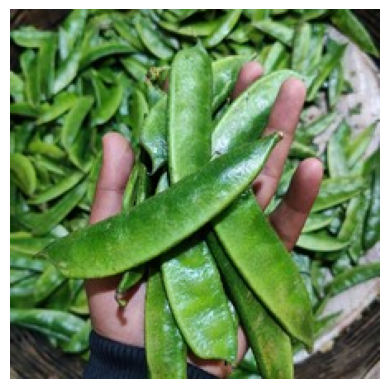

In [29]:
image_path = '/content/Vegetable Images/test/Bean/0001.jpg'

img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

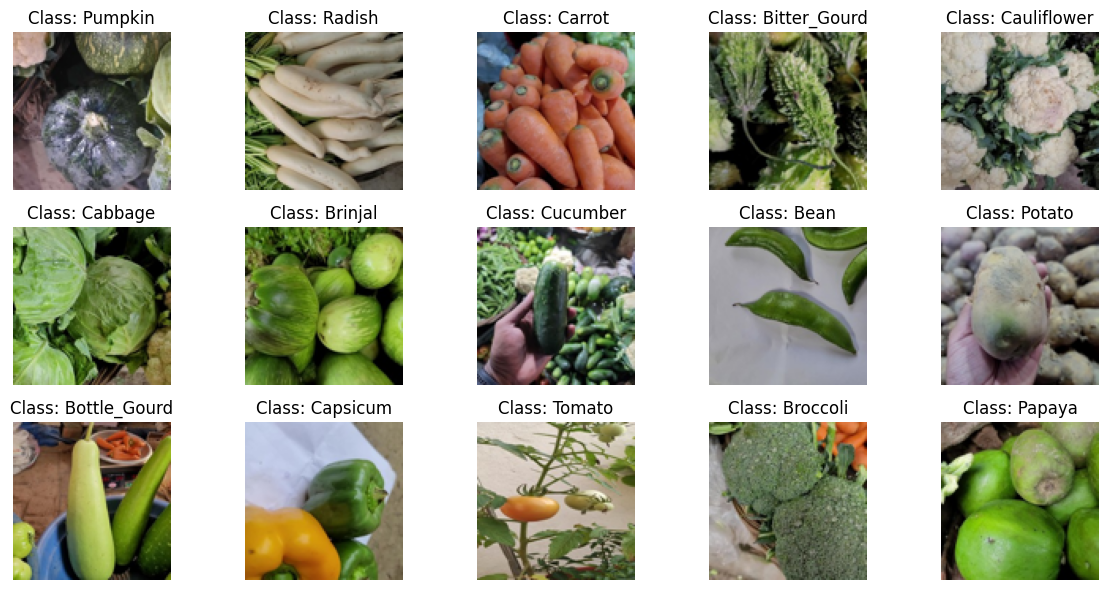

In [33]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def show_resized_images_in_subplot(base_path, target_size=(100, 100), figure_size=(12, 6)):
    # Get all categories
    categories = os.listdir(base_path)

    # Set up the subplot grid
    rows = 3
    columns = 5
    fig, axes = plt.subplots(rows, columns, figsize=figure_size)

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    for i, category in enumerate(categories):
        category_path = os.path.join(base_path, category)

        # Display the first image from each class
        image_files = [f for f in os.listdir(category_path) if f.endswith(".jpg")]
        if image_files:
            first_image_path = os.path.join(category_path, image_files[0])
            img = Image.open(first_image_path)

            # Resize the image
            img = img.resize(target_size)

            # Display the resized image along with the class name
            axes[i].imshow(img)
            axes[i].set_title(f"Class: {category}")
            axes[i].axis('off')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()

# Specify the base path where classes are located
base_path = '/content/Vegetable Images/train'

# Call the function to display resized images in subplot
show_resized_images_in_subplot(base_path)


In [34]:
BATCH_SIZE = 32
TARGET_SIZE = [224,224]
CLASS_MODE = 'categorical'

In [38]:
dataset = '/content/Vegetable Images'
train_folder = os.path.join(dataset,'train')
test_folder = os.path.join(dataset,'test')
validation_folder = os.path.join(dataset,'validation')

In [35]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True
)

In [36]:
test_gen = ImageDataGenerator(
    rescale = 1./255
)

In [37]:
validation_gen = ImageDataGenerator(
    rescale = 1./255
)

In [39]:
train_data = train_gen.flow_from_directory(
    train_folder,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = CLASS_MODE
)

Found 15000 images belonging to 15 classes.


In [40]:
test_data = test_gen.flow_from_directory(
    test_folder,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = CLASS_MODE
)

Found 3000 images belonging to 15 classes.


In [41]:
validation_data = validation_gen.flow_from_directory(
    validation_folder,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = CLASS_MODE
)

Found 3000 images belonging to 15 classes.


In [42]:
dir(train_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

In [62]:
class_indices = train_data.class_indices

In [45]:
# now create pre_trained model
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
resnet_base = ResNet50V2(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

94668760/94668760 [==============================] - 0s 0us/step


In [46]:
resnet_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [50]:
resnet_base.trainable = False

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout




model = Sequential()

model.add(resnet_base)

# Flatten layer
model.add(Flatten())

# Dense layers with dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add a dropout layer with a dropout rate of 0.5
model.add(Dense(15, activation='softmax'))

# Compile the model and specify the optimizer, loss, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 15)                3855      
                                                                 
Total params: 49259023 (187.91 MB)
Trainable params: 25694223 (98.02 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [57]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // BATCH_SIZE,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    callbacks = [early_stopping],
    validation_data=validation_data,
    validation_steps=validation_data.samples // BATCH_SIZE  # Validation steps
)

Epoch 1/5
468/468 [==============================] - 210s 430ms/step - loss: 0.9694 - accuracy: 0.8832 - val_loss: 0.1060 - val_accuracy: 0.9775
Epoch 2/5
468/468 [==============================] - 202s 431ms/step - loss: 0.4467 - accuracy: 0.9251 - val_loss: 0.0541 - val_accuracy: 0.9896
Epoch 3/5
468/468 [==============================] - 198s 424ms/step - loss: 0.3628 - accuracy: 0.9372 - val_loss: 0.0651 - val_accuracy: 0.9896
Epoch 4/5
468/468 [==============================] - 198s 422ms/step - loss: 0.3058 - accuracy: 0.9434 - val_loss: 0.0582 - val_accuracy: 0.9933


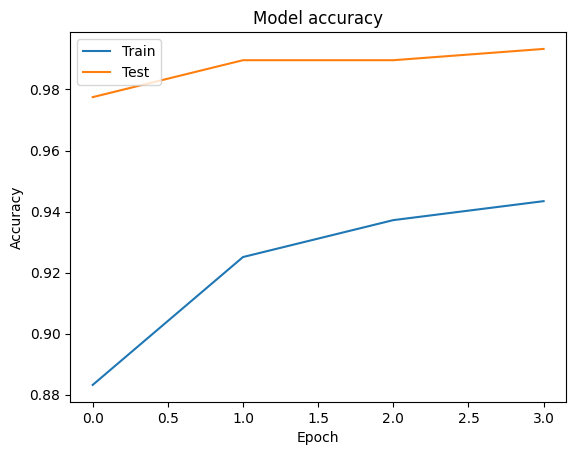

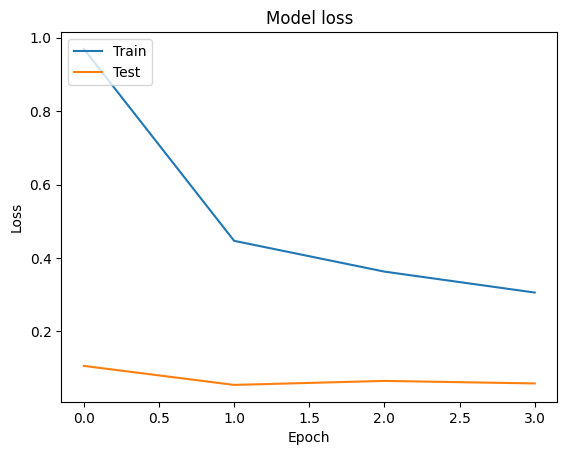

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [59]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_data, steps=validation_data.samples // BATCH_SIZE)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
93/93 [==============================] - 9s 93ms/step - loss: 0.0538 - accuracy: 0.9899
Validation Accuracy: 98.99%


In [60]:
# Model Evaluation
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(test_data, steps=test_data.samples // BATCH_SIZE)
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

Evaluating model...
93/93 [==============================] - 8s 87ms/step - loss: 0.0998 - accuracy: 0.9882
Validation Accuracy: 98.82%


In [63]:
class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [68]:
from PIL import Image
import numpy as np

# Assuming you have the following function definitions

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)

    # Use softmax to convert the predictions to probabilities
    probabilities = np.exp(predictions) / np.sum(np.exp(predictions), axis=1, keepdims=True)

    # Get the predicted class index
    predicted_class_index = np.argmax(probabilities, axis=1)[0]

    # Adjust for the 1-indexed class indices
    predicted_class_name = list(class_indices.keys())[predicted_class_index]

    # Optionally, you can also return the predicted probabilities for each class
    return predicted_class_name, probabilities[0]
# Example usage
image_path = '/content/Vegetable Images/test/Bottle_Gourd/1001.jpg'
predicted_class_name, predicted_probabilities = predict_image_class(model, image_path, class_indices)

print(f"Predicted Class: {predicted_class_name}")
print(f"Predicted Probabilities: {predicted_probabilities}")


1/1 [==============================] - 0s 23ms/step
Predicted Class: Bottle_Gourd
Predicted Probabilities: [0.05983984 0.05983984 0.16199651 0.0598399  0.05983984 0.05983984
 0.05983984 0.05984013 0.05983984 0.05984098 0.05983986 0.05983987
 0.05983984 0.0598404  0.06008344]


In [69]:
model.save('/content/drive/MyDrive/models/vegetable_prediction_resnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
